1. Usando el dataset `winequality-red.csv`, el cual consiste en datos de vinos rojos basados en datos físico-químicos y una métrica de calidad de vino. Más info en [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009). Queremos predecir la calidad del vino usando los atributos físico-químicos del mismo.
	1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente (vea la documentación del dataset). Además, analice que tipo de variables (incluido el target) son, cuál es el rango de estas variables y cómo se distribuyen (histograma). Además, realice una matriz de correlación, ¿cuáles variables parecen estar correlacionadas? y con respectos a la calidad del vino?

In [1]:
import numpy as np
import pandas as pd 

In [2]:
url = "https://raw.githubusercontent.com/Vic-bit/aprMaqI_CEIA/main/clase2/ejercicios/datasets/winequality-red.csv"
winequality = pd.read_csv(url)

In [3]:
winequality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Tiene 11 features y 1 variable de salida que es la calidad (quality): output variable (based on sensory data, score between 0 and 10)

- 1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- 2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- 3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- 4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and 
- 5 - chlorides: the amount of salt in the wine
- 6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents 
- 7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 
- 8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content
- 9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- 10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and 
- 11 - alcohol: the percent alcohol content of the wine

In [4]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se ve que todas las variables son float menos el target que es un entero.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

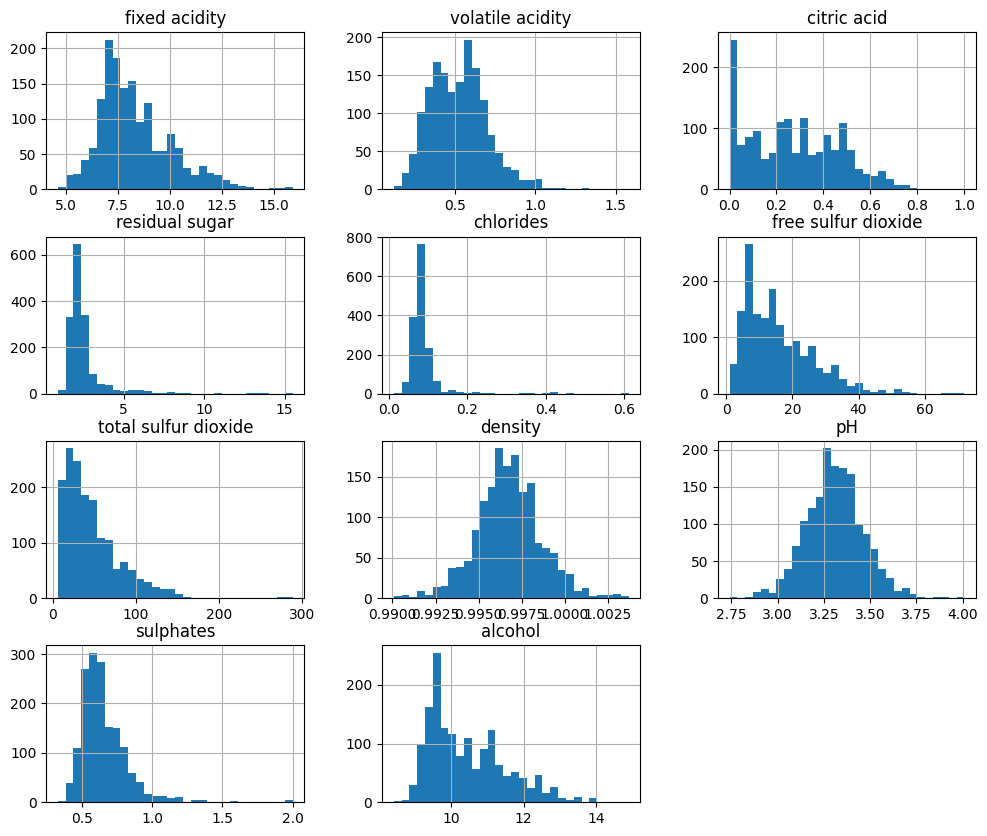

In [5]:
input_var_cuali = []
input_var_cuanti =  ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
output_var =['quality']
input_var = winequality.drop(columns=output_var)
input_var[input_var_cuanti].hist(bins=30, figsize=(12,10))

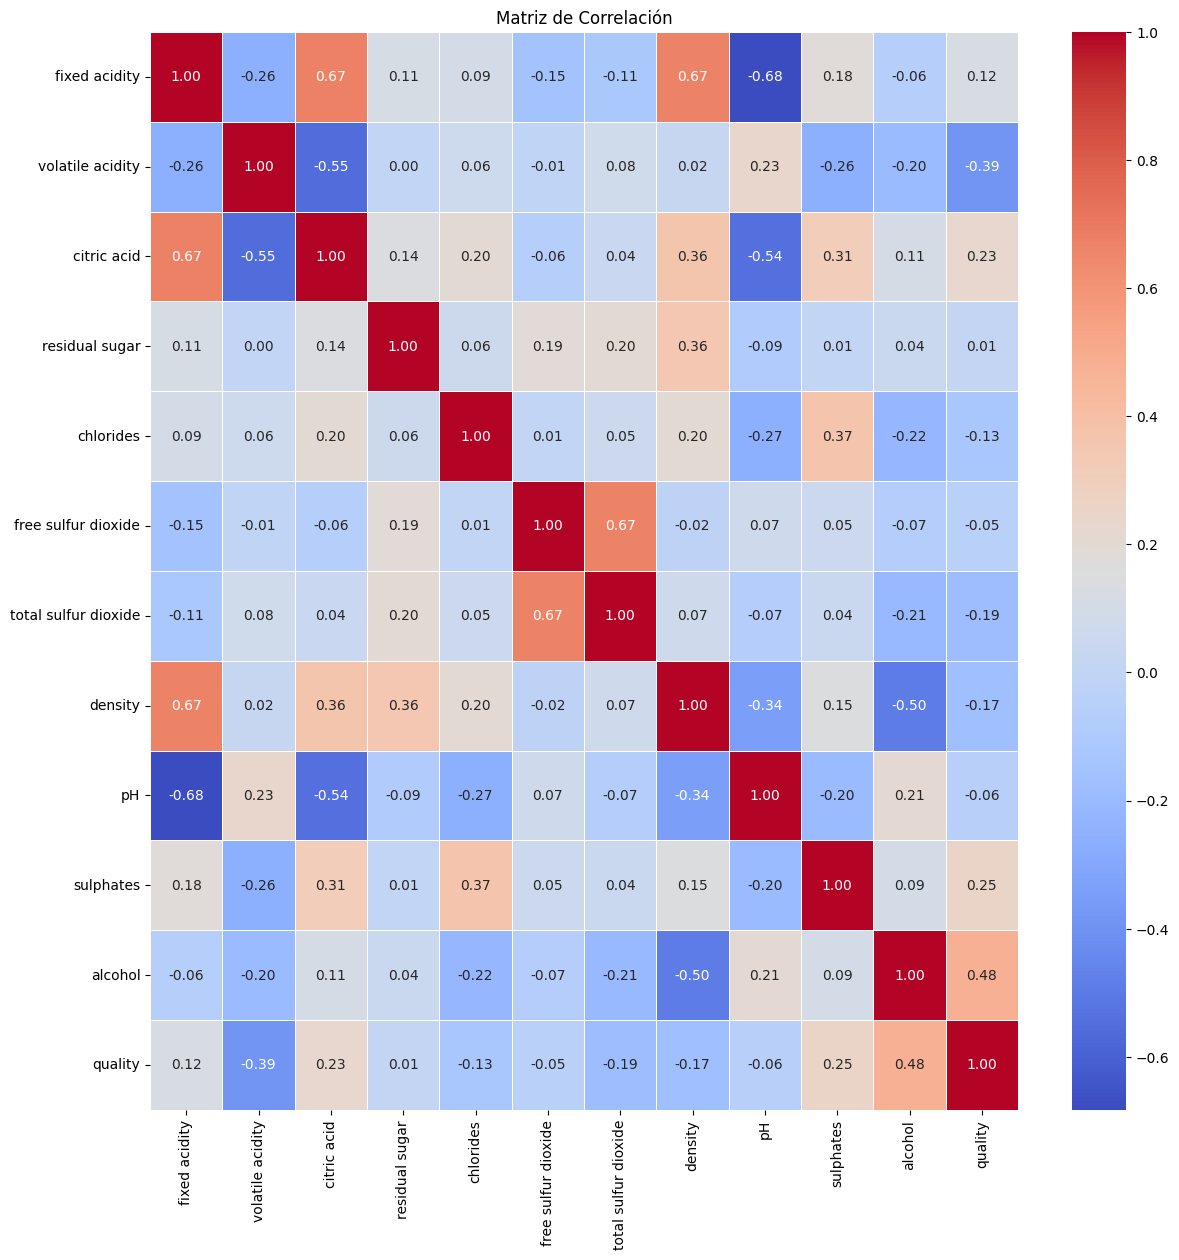

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = winequality.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se observa que la variable más relacionada con la calidad del vino es el alcohol con 0.48 de forma proporcional, seguido del la acidez volátil pero de forma inversamente proporcional.
Entre las variables las que más se correlacionan son:
- La fixed acidity con citric acid y con density, ambas con un valor de 0.67
- Free sulfur dioxide con total sulfur dioxide con un valor de 0.67
- De forma inversa fixed acidity con pH con -0.67
- De froma inversa volatile acidity con citric acid con 0.55

2. Realice si es necesario limpieza de datos y corrección de errores.

No fue necesario limpiar los datos porque el dataset estaba completo.

In [7]:
winequality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

3. Construya un modelo de regresión lineal simple, el cual se intente predecir la calidad del vino usando el nivel de alcohol.
    	
		1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.
    	
		2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)
    	
		3. Entrene el modelo con el set de entrenamiento.
    	
		4. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson.

3.1

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = winequality.loc[:, "alcohol"].values #Se arma un array de Numpy
y = winequality.loc[:, "quality"].values

In [10]:
print('Cantidad de elementos de X: ', X.shape) #Para que quede vertical
print('Cantidad de elementos de y: ', y.shape)
X = X.reshape([-1,1])
y = y.reshape([-1,1])
print('Cantidad de elementos de X: ', X.shape) #Para que quede vertical
print('Cantidad de elementos de y: ', y.shape)

Cantidad de elementos de X:  (1599,)
Cantidad de elementos de y:  (1599,)
Cantidad de elementos de X:  (1599, 1)
Cantidad de elementos de y:  (1599, 1)


In [11]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("El tamaño de X_train es: ", len(X_train))
print("El tamaño de X_test es: ", len(X_test))
print("El tamaño de y_train es: ", len(y_train))
print("El tamaño de y_test es: ", len(y_test))

El tamaño de X_train es:  1279
El tamaño de X_test es:  320
El tamaño de y_train es:  1279
El tamaño de y_test es:  320


3.2 - Se va a verificar si se tienen muchos outiliers

<Axes: ylabel='alcohol'>

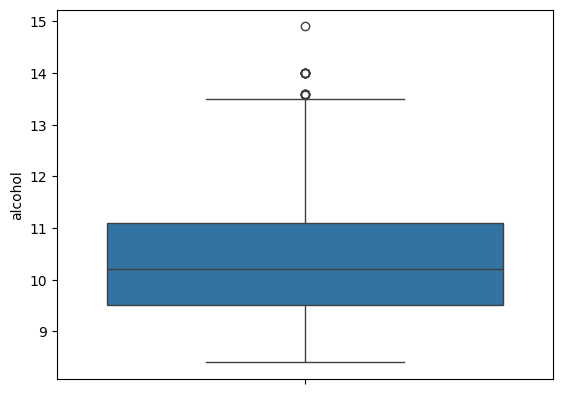

In [12]:
sns.boxplot(data=winequality, y='alcohol')

Al tener varios outliers no conviene MSE y RMSE, así que se va a usar MAE.

3.3

In [13]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression() #Se crea el objeto regresion

In [14]:
regression.fit(X_test, y_test) #Se debe pasar el vector como nx1 y no (n,)

LinearRegression()

3.4

In [15]:
print(f"El coeficiente de relación de Pearson es: {regression.score(X_train,y_train)}")

El coeficiente de relación de Pearson es: 0.21920344993210872


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
y_pred = regression.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  0.5801989136840701
MSE:  0.4967942025598946
RMSE:  0.7048362948656196


4. Construya un modelo de regresión lineal múltiple, usando todos los atributos
    	
		1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.
    	
		2. Entrene el modelo con el set de entrenamiento.
    	
		3. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson. Use la misma métrica que en el punto anterior.

4.1

In [19]:
X = winequality.loc[:,['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] #Se arma un array de Numpy
y = winequality.loc[:, "quality"].values

In [20]:
#X = X.reshape([-1,1])
y = y.reshape([-1,1])
print('Cantidad de elementos de X: ', X.shape) #Para que quede vertical
print('Cantidad de elementos de y: ', y.shape)

Cantidad de elementos de X:  (1599, 11)
Cantidad de elementos de y:  (1599, 1)


In [21]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ", X_test.shape)
print("El tamaño de y_train es: ", len(y_train))
print("El tamaño de y_test es: ", len(y_test))

El tamaño de X_train es:  (1279, 11)
El tamaño de X_test es:  (320, 11)
El tamaño de y_train es:  1279
El tamaño de y_test es:  320


In [22]:
regression_multi = LinearRegression() #Se crea el objeto regresion

In [23]:
regression_multi.fit(X_test, y_test) #Se debe pasar el vector como nx1 y no (n,)

LinearRegression()

In [24]:
print(f"El coeficiente de relación de Pearson es: {regression_multi.score(X_train,y_train)}")

El coeficiente de relación de Pearson es: 0.32050093985845207


In [25]:
y_pred = regression_multi.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  0.4976376899223066
MSE:  0.3745045478353813
RMSE:  0.6119677669905347


	5. Partiendo del modelo anterior, que involucra todos los atributos, realiza una construcción de modelo hacia atrás, de la misma forma que vimos en clase (utilice `statsmodels`) y el test de hipótesis de bondad de ajuste hasta que se llegue el número de atributos que no se puedan eliminar.
    	1. Una vez seleccionado los atributos a usar, entrene el modelo y realice los pasos del punto anterior.

2. Lea el dataset `bluegills.csv` (OBS, tenga en cuenta que el csv la separación entre columnas es con **\t**), el cual consiste en el registro de 78 lepomis macrochirus medidos en longitud y edad. Se busca determinar como el tamaño del pez depende de la edad. Mas info [acá](https://online.stat.psu.edu/stat501/lesson/9/9.8). Realice un analisis inicial de los datos y construya modelos de regresion polinomica de diferente orden, haciendo previamente la separación entre datos de entrenamiento y validación. Mida con alguna metrica y encuentre el modelo que mejor se ajusta a los datos de validación.

In [28]:
import numpy as np
import pandas as pd 

In [29]:
url = "https://raw.githubusercontent.com/Vic-bit/aprMaqI_CEIA/main/clase2/ejercicios/datasets/bluegills.csv"
bluegills = pd.read_csv(url)

In [30]:
bluegills.head()

,age\tlength
0,1\t67
1,1\t62
2,2\t109
3,2\t83
4,2\t91


In [31]:
bluegills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age	length  78 non-null     object
dtypes: object(1)
memory usage: 752.0+ bytes


In [32]:
bluegills = bluegills.rename(columns={'age\tlength' : 'age_length'})

In [33]:
bluegills.head()

,age_length
0,1\t67
1,1\t62
2,2\t109
3,2\t83
4,2\t91


In [34]:
bluegills["age"] = bluegills['age_length'].str[:1].astype(int)
bluegills["length"] = bluegills['age_length'].str[2:].astype(float)

In [35]:
bluegills.head()

,age_length,age,length
0,1\t67,1,67.0
1,1\t62,1,62.0
2,2\t109,2,109.0
3,2\t83,2,83.0
4,2\t91,2,91.0


<Axes: >

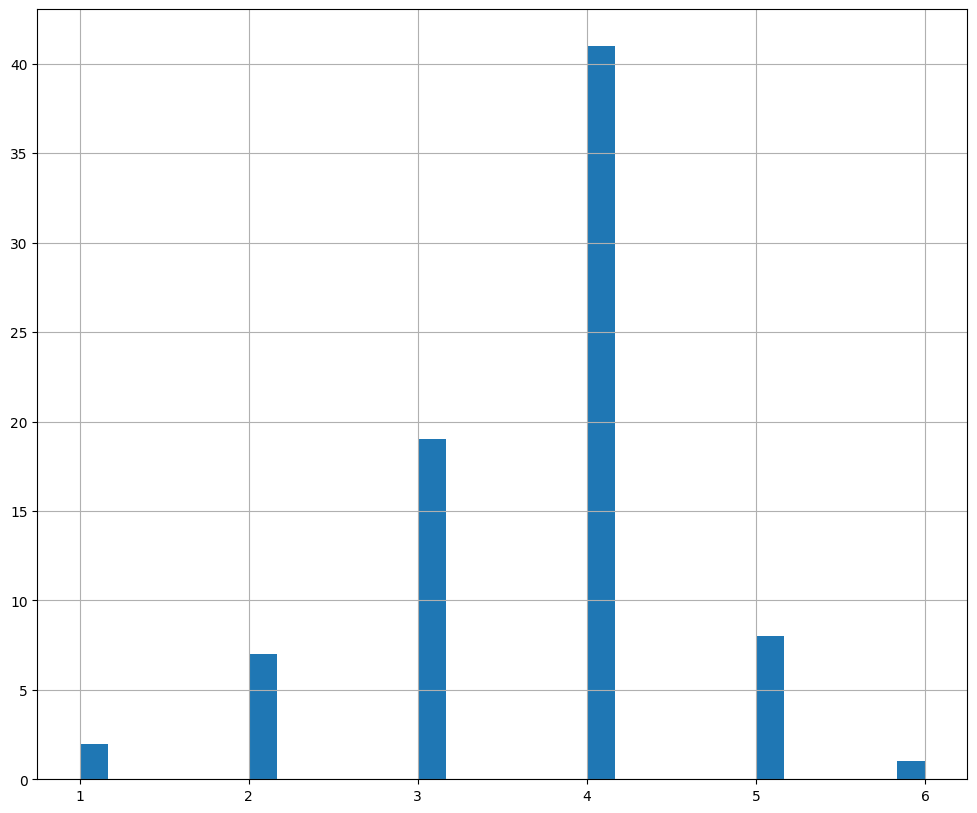

In [36]:
input_var = bluegills.drop(columns="length")
input_var["age"].hist(bins=30, figsize=(12,10))

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X = bluegills["age"]
y = bluegills["length"]

In [39]:
X = X.values.reshape(-1,1)



In [40]:
y = y.values.reshape(-1,1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [42]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ", X_test.shape)
print("El tamaño de y_train es: ", len(y_train))
print("El tamaño de y_test es: ", len(y_test))

El tamaño de X_train es:  (62, 1)
El tamaño de X_test es:  (16, 1)
El tamaño de y_train es:  62
El tamaño de y_test es:  16


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

MAE:  12.162698412698411
MSE:  194.26984126984127
RMSE:  13.938071648181511
El coeficiente de relación de Pearson es 0.7111856498344828


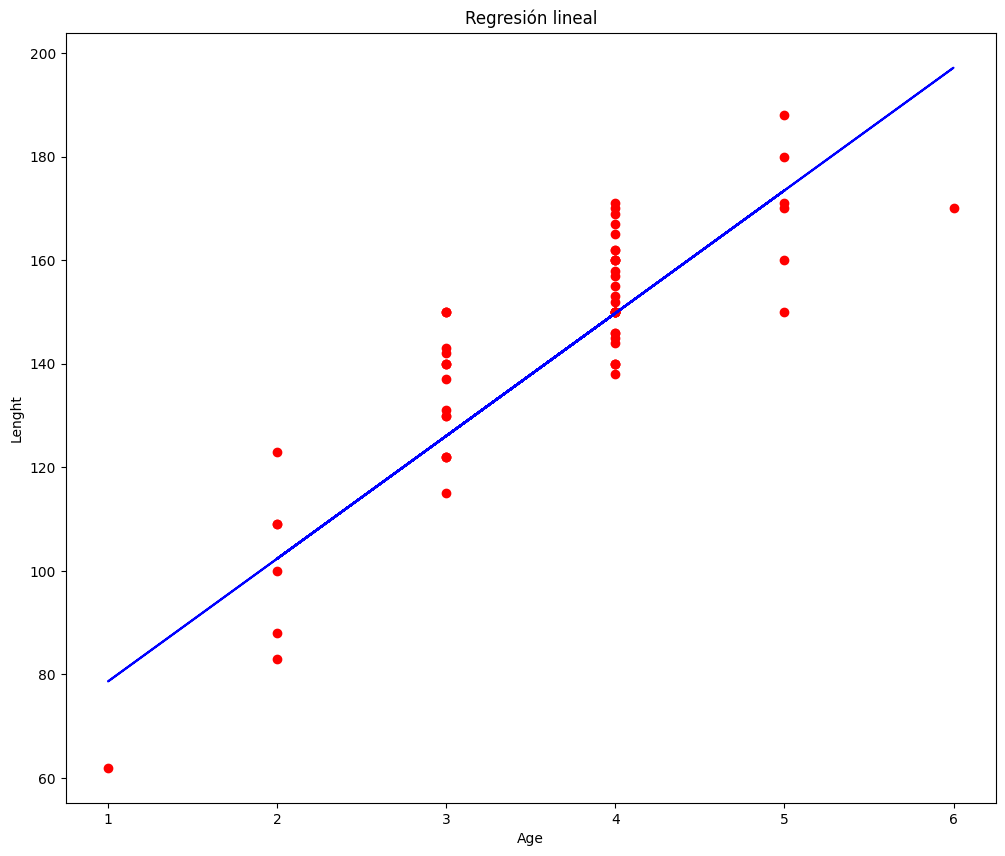

In [45]:
#Modelo lineal
linear = LinearRegression()
linear.fit(X_test, y_test)

plt.figure
plt.figure(figsize = (12,10))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train,linear.predict(X_train), color = "blue")
plt.title("Regresión lineal")
plt.xlabel("Age")
plt.ylabel("Lenght")

y_pred = linear.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

print(f"El coeficiente de relación de Pearson es {linear.score(X_train, y_train)}")

In [18]:
from sklearn.preprocessing import PolynomialFeatures
polinomial = PolynomialFeatures(degree=2)

In [19]:
X_pol = polinomial.fit_transform(X_train)
linear2 = LinearRegression()
linear2.fit(X_pol,y_train)

LinearRegression()

El coeficiente de relación de Pearson es 0.7971074378011582


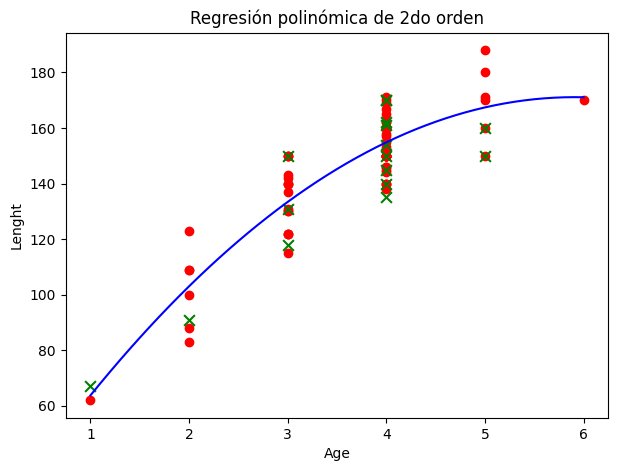

In [20]:
plt.figure(figsize=(7,5))
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test, color = "green", marker="x", s=60)
plt.plot(X_grid, linear2.predict(polinomial.fit_transform(X_grid)), color = 'blue')
plt.title("Regresión polinómica de 2do orden")
plt.xlabel('Age')
plt.ylabel('Lenght')

print(f"El coeficiente de relación de Pearson es {linear2.score(X_pol, y_train)}")

El coeficiente de relación de Pearson es 0.7978018948754659


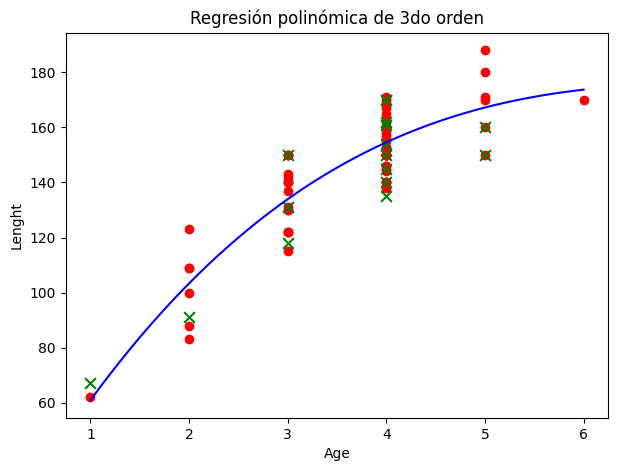

In [21]:
polinomial = PolynomialFeatures(degree=3)

X_pol = polinomial.fit_transform(X_train)
linear3 = LinearRegression()
linear3.fit(X_pol, y_train)

plt.figure(figsize=(7,5))
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test, color = "green", marker="x", s=60)
plt.plot(X_grid, linear3.predict(polinomial.fit_transform(X_grid)), color = 'blue')
plt.title("Regresión polinómica de 3do orden")
plt.xlabel('Age')
plt.ylabel('Lenght')

print(f"El coeficiente de relación de Pearson es {linear3.score(X_pol, y_train)}")

El coeficiente de relación de Pearson es 0.7980783794478252


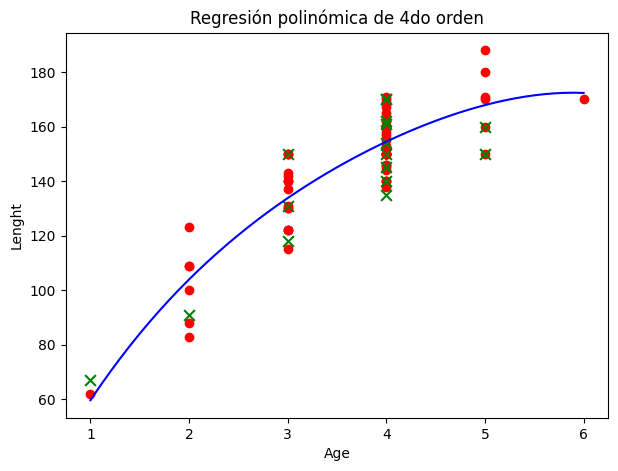

In [24]:
polinomial = PolynomialFeatures(degree=4)

X_pol = polinomial.fit_transform(X_train)
linear4 = LinearRegression()
linear4.fit(X_pol, y_train)

plt.figure(figsize=(7,5))
X_grid = np.arange(np.min(X), np.max(X)+0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_test, color = "green", marker="x", s=60)
plt.plot(X_grid, linear4.predict(polinomial.fit_transform(X_grid)), color = 'blue')
plt.title("Regresión polinómica de 4do orden")
plt.xlabel('Age')
plt.ylabel('Lenght')

print(f"El coeficiente de relación de Pearson es {linear4.score(X_pol, y_train)}")

Con una regresión polinómica de grado 2 es suficiente porque en los otros casos mejora muy poco.